DATA WRANGLING
---
Data wrangling is a process of "cleaning", "Transforming",and "organizing" data so that it can be used for analyzing and visualiztion it is the important step in data analysis process because raw data is often incomplete, inconsistant and in ununderstood format which can make it difficult to work with data.\
. Data wrangling helps to make the data more constitant , accurate and useful for analysis and      decision making.\
. Data science is all about data driven decision making


Some Important steps for data wrangling
---
. Every data has its own nature and required different aapprocah but following are some steps generally followed\
Steps\
1. Gathering data
2. Tools to clean daata (which tools to be used, it mean libraries)
3. How to do (clean)
   steps
   1. 
4. 


In [110]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [111]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [113]:
#Assessing the data
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [114]:
df.drop(columns='deck',inplace=True)

In [115]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [116]:
df['age'] = df['age'].fillna(df['age'].mean())

In [117]:
df.isnull().sum()/len(df)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [118]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [119]:
df.isnull().sum()/len(df)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [120]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [121]:
df.isnull().sum()/len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

Outliers removal
---

1. Visulization method\
through boxplot

<Axes: xlabel='sex', ylabel='age'>

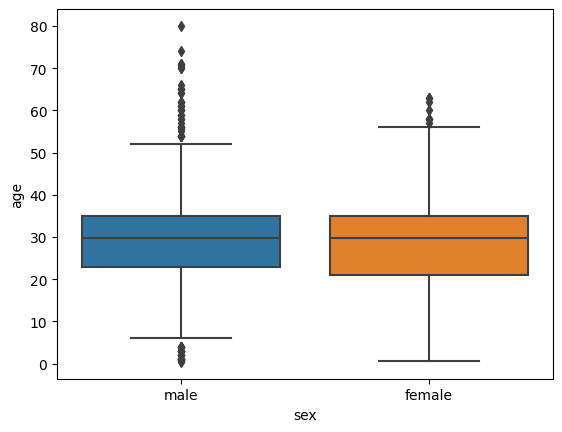

In [122]:
import seaborn as sns
sns.boxplot(data=df, y= 'age', x='sex')


2. IQR Method

In [123]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [124]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

In [125]:
df.shape

(718, 14)

<Axes: xlabel='fare', ylabel='Count'>

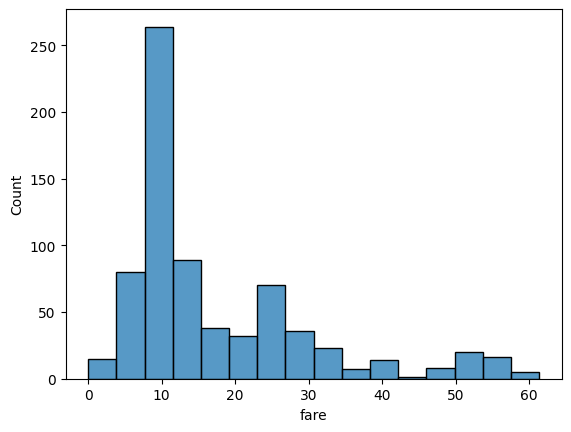

In [126]:
sns.histplot(df['fare'])

Z- Score Method

In [127]:
#pip intall scipy
#from scipy import stats
#import numpy as np
#zscore=np.abs(stats.zscore(df['age']))
#threshold =3 
#df = df[(z< threshold).all(axis=1)]

Finding and dropping duplicate

In [128]:
df.shape

(718, 14)

In [129]:
df.duplicated().sum()

103

In [130]:
df.drop_duplicates(inplace=True)

In [102]:
df.shape

(615, 14)

DATA NORMALIZATION
---
to bring data at one scale

In [106]:

#1 Import Libraries
#pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#2 bring data



#3select columns to normalize
cols_to_normalize = ['age','fare']
#4 create the scaller function /tool
scaler=MinMaxScaler()

#5 fit and transform the data on scaler or vice versa
df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,0.474509,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True


In [107]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.360976,2.469919,0.497584,0.460163,0.365854,0.298831
std,0.480674,0.741063,0.209485,0.894039,0.835572,0.221334
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.372549,0.000000,0.000000,0.128640
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.211798
75%,1.000000,3.000000,0.607843,1.000000,0.000000,0.423596
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


agian same scaling with standardscaler

In [108]:
#1 Import Libraries
#pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler

#2 bring data



#3select columns to normalize
cols_to_normalize = ['age','fare']
#4 create the scaller function /tool
scaler=StandardScaler()

#5 fit and transform the data on scaler or vice versa
df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.597354,1,0,-0.817136,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.222648,0,0,-0.767410,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.620441,1,0,2.560585,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.620441,0,0,-0.758201,S,Third,man,True,Southampton,no,True
5,0,3,male,0.123872,0,0,-0.728122,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.995147,0,5,0.794372,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.878384,0,0,0.858832,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.123872,1,2,0.376301,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.222648,0,0,0.858832,C,First,man,True,Cherbourg,yes,True


In [109]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,6.150000e+02,615.000000,615.000000,6.150000e+02
mean,0.360976,2.469919,3.061688e-16,0.460163,0.365854,-1.213122e-16
std,0.480674,0.741063,1.000814e+00,0.894039,0.835572,1.000814e+00
min,0.000000,1.000000,-2.377209e+00,0.000000,0.000000,-1.351236e+00
25%,0.000000,2.000000,-5.973545e-01,0.000000,0.000000,-7.695610e-01
50%,0.000000,3.000000,1.238725e-01,0.000000,0.000000,-3.935399e-01
75%,1.000000,3.000000,5.267644e-01,1.000000,0.000000,5.641565e-01
max,1.000000,3.000000,2.400296e+00,5.000000,6.000000,3.170505e+00


Equation for standdard devition 
for standardscaler equation 
x_stand =(x-mean(x))/std(x)
where:
x_stand is standarized variable
x is the origional variable
mean(x) is the mean of variable x
std(x) is standard deviation of variable x

Log Transformation
---

In [131]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.360976,2.469919,28.376776,0.460163,0.365854,18.342005
std,0.480674,0.741063,10.683717,0.894039,0.835572,13.585289
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,13.000000
75%,1.000000,3.000000,34.000000,1.000000,0.000000,26.000000
max,1.000000,3.000000,54.000000,5.000000,6.000000,61.379200


In [ ]:
#do yourself as anassignemnt 

In [142]:
kashti = sns.load_dataset('titanic')
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [143]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

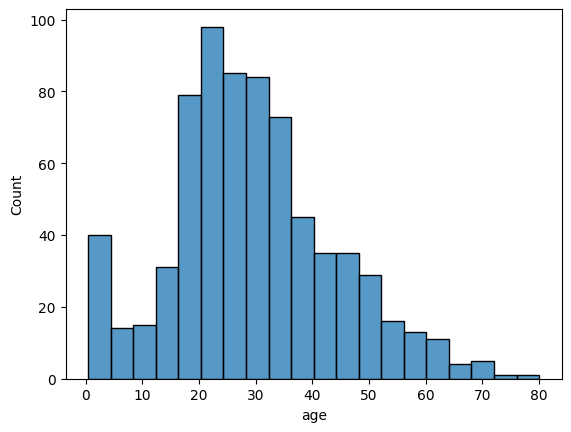

In [144]:
sns.histplot(kashti['age'])

In [145]:
import numpy as np
kashti['age']=kashti['age'].fillna(kashti['age'].median())
kashti['age']=kashti['fare'].fillna(kashti['fare'].median())


#log transform
kashti['age']=np.log(kashti['age'])
kashti['fare']=np.log(kashti['fare'])
kashti.head()

c:\Users\B S COM\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1.981001,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,4.266662,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,2.070022,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.972177,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,2.085672,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


kindly look for logp1 in numpy documentation its for your assignment

<Axes: xlabel='sex', ylabel='fare'>

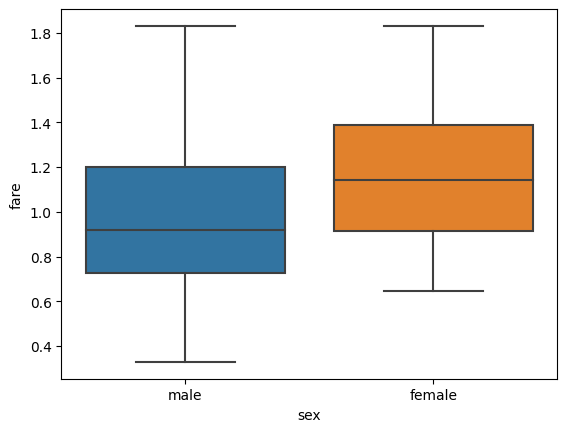

In [139]:
sns.boxplot(data=kashti, x= 'sex',y='fare')

<Axes: xlabel='age', ylabel='Count'>

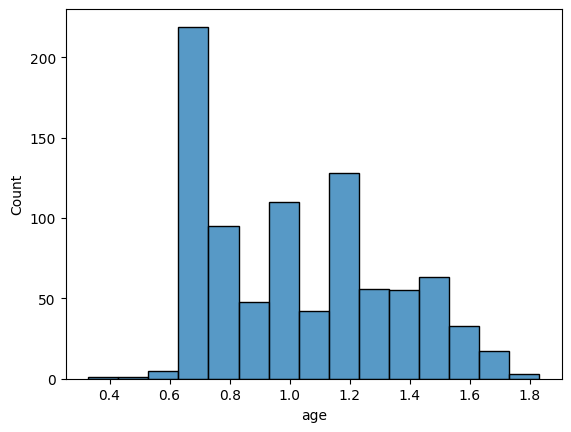

In [140]:
sns.histplot(kashti['age'])

Again Log transformation 


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
kashti1 = sns.load_dataset('titanic')
kashti1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
kashti1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

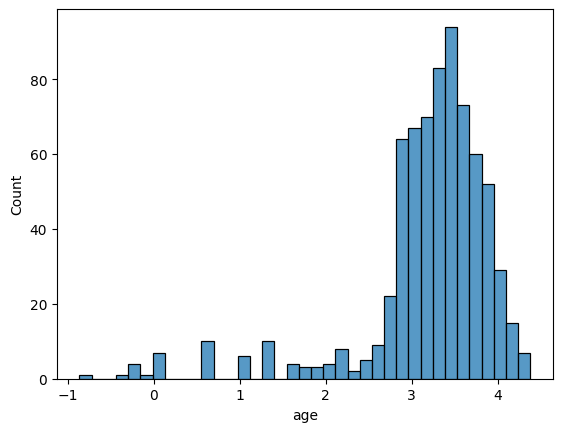

In [25]:
sns.histplot(kashti1['age'])

<Axes: xlabel='sex', ylabel='fare'>

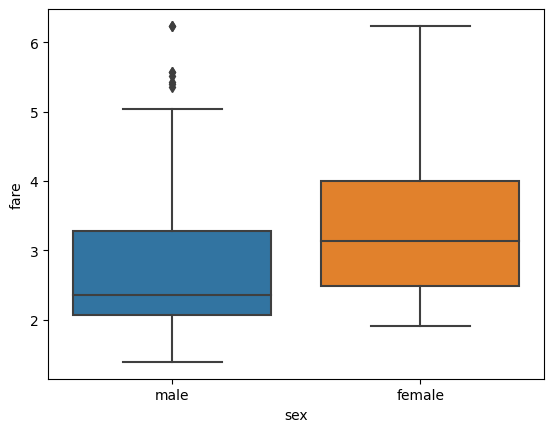

In [24]:
sns.boxplot(data=kashti1,x='sex',y='fare')

In [21]:
import numpy as np
kashti1['age']=kashti1['age'].fillna(kashti1['age'].median())
kashti1['fare']=kashti1['fare'].fillna(kashti1['fare'].median())
#log transform
kashti1['age']=np.log(kashti['age'])
kashti1['fare']=np.log(kashti['fare'])
kashti1.head()

c:\Users\B S COM\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


also try logp1 at your own assignment

<Axes: xlabel='sex', ylabel='fare'>

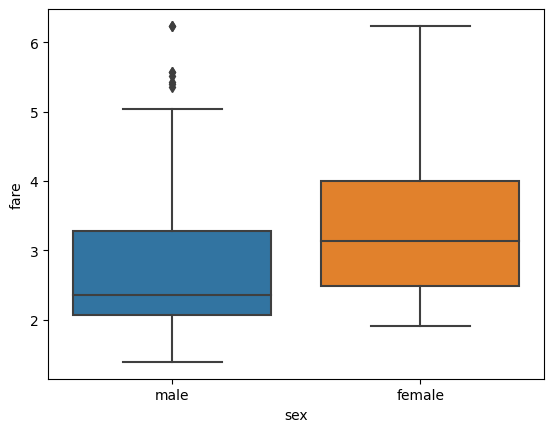

In [22]:
sns.boxplot(data=kashti1,x='sex',y='fare')

<Axes: xlabel='age', ylabel='Count'>

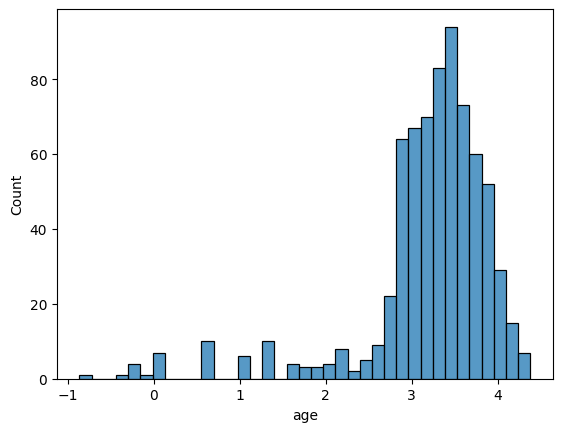

In [23]:
sns.histplot(kashti1['age'])

Organizing the data
---

In [33]:
import seaborn as sns
df= sns.load_dataset("titanic")

In [34]:
df['family_size']=df['sibsp']+df['parch']

<Axes: xlabel='family_size', ylabel='Count'>

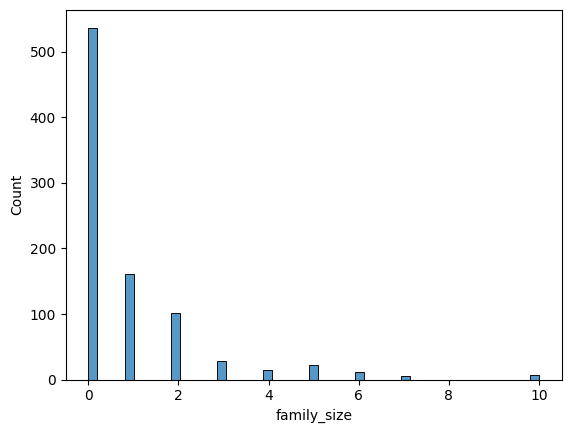

In [35]:
sns.histplot(df['family_size'])

<Axes: xlabel='sex', ylabel='age'>

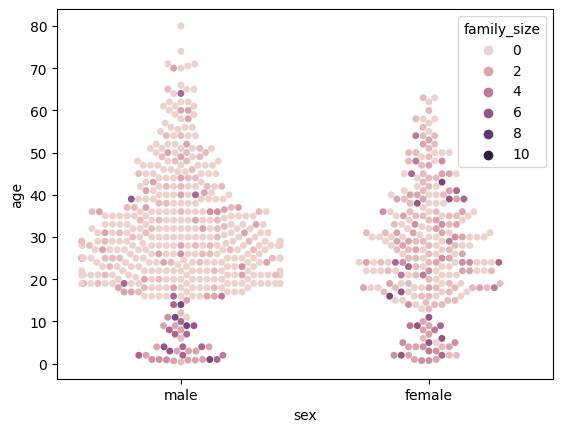

In [37]:
sns.swarmplot(data=df, x= "sex",y='age',hue='family_size')

In [40]:
df= df.rename(columns={'survived':'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'family_size'],
      dtype='object')

In [44]:
table=pd.pivot_table(df, values='fare',index='who',columns='survival',aggfunc=np.mean)
table

survival,0,1
who,,
child,32.633703,32.891329
man,21.490736,42.076422
woman,20.967174,54.813801


<Axes: xlabel='fare', ylabel='age'>

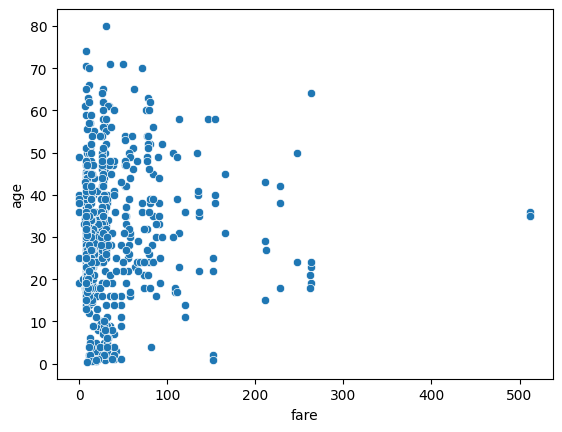

In [46]:
sns.scatterplot(data=df, x= 'fare', y= 'age')

In [47]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


Saving the wrangled data

In [ ]:
df.to_csv("pre_processed_data_csv")